In [ ]:
pip install kaggle


In [ ]:
#!/bin/bash

!kaggle datasets download balaka18/email-spam-classification-dataset-csv

Dataset URL: https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv
License(s): ODbL-1.0
  0% 0.00/1.66M [00:00<?, ?B/s]
100% 1.66M/1.66M [00:00<00:00, 143MB/s]


In [ ]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import time

In [ ]:
def prepare_data(path: str) -> pd.DataFrame:
    with zipfile.ZipFile(path, 'r') as zip_ref:
        zip_ref.extractall()

    folder_path = path.split("/")[-1].split(".")[0]
    df = pd.read_csv(f'/content/emails.csv')
    return df


In [ ]:
data = prepare_data("/content/email-spam-classification-dataset-csv.zip")

# Data analysis

## Word Frequency Distributions

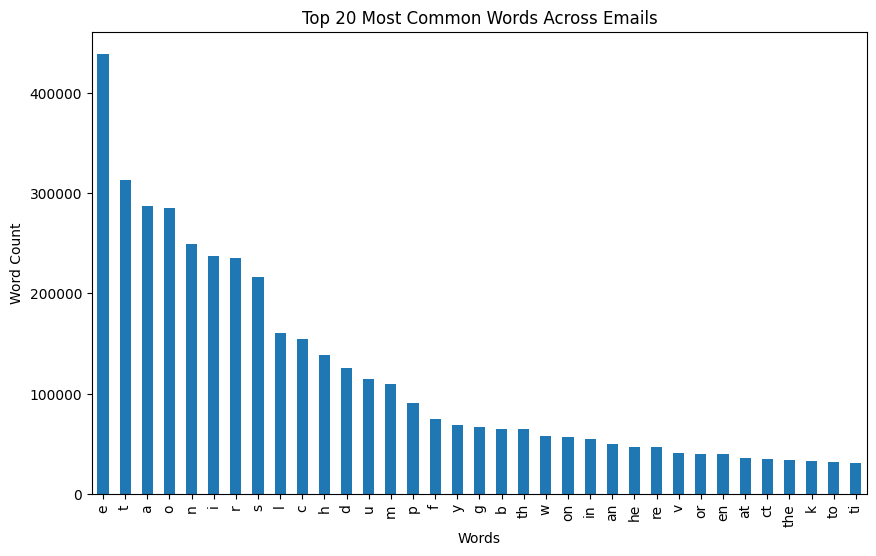

In [ ]:
word_frequencies = data.iloc[:, 1:-1].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
word_frequencies[:35].plot(kind='bar')
plt.title('Top 20 Most Common Words Across Emails')
plt.ylabel('Word Count')
plt.xlabel('Words')
plt.xticks(rotation=90)
plt.show()

## Correlation Heatmap

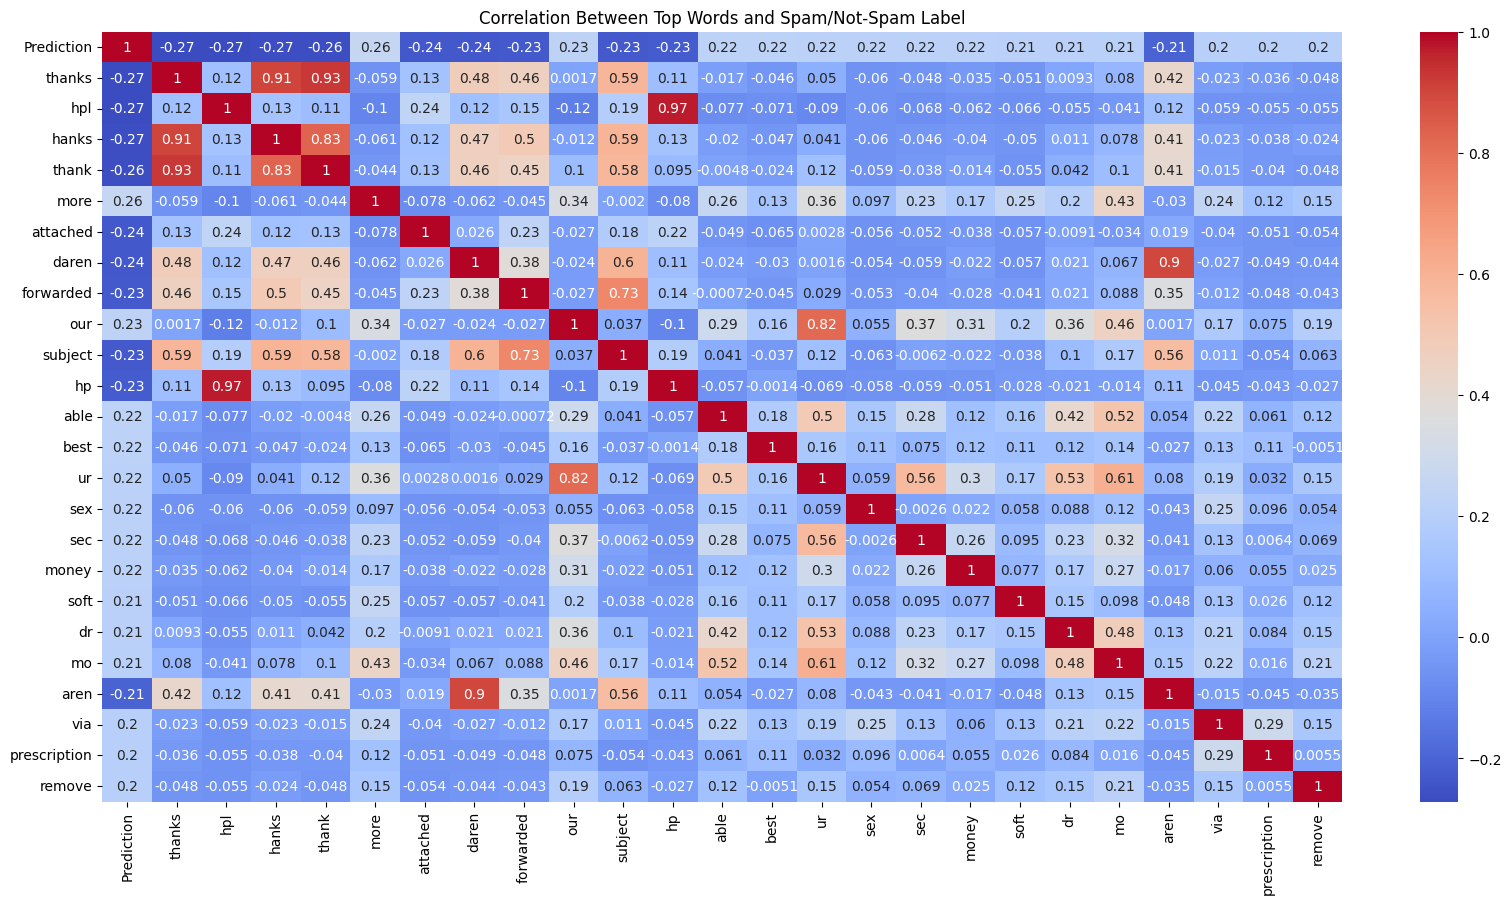

In [ ]:
correlations = data.iloc[:, 1:].corrwith(data['Prediction'])
top_words = correlations.abs().sort_values(ascending=False)[:25]
plt.figure(figsize=(20,10))
sns.heatmap(data[top_words.index].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Top Words and Spam/Not-Spam Label')
plt.show()


## Spam vs Not-Spam Word Cloud

In [ ]:
spam_df = data[data['Prediction'] == 1]
not_spam_df = data[data['Prediction'] == 0]

spam_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(spam_df.iloc[:, 1:-1].sum())
not_spam_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(not_spam_df.iloc[:, 1:-1].sum())


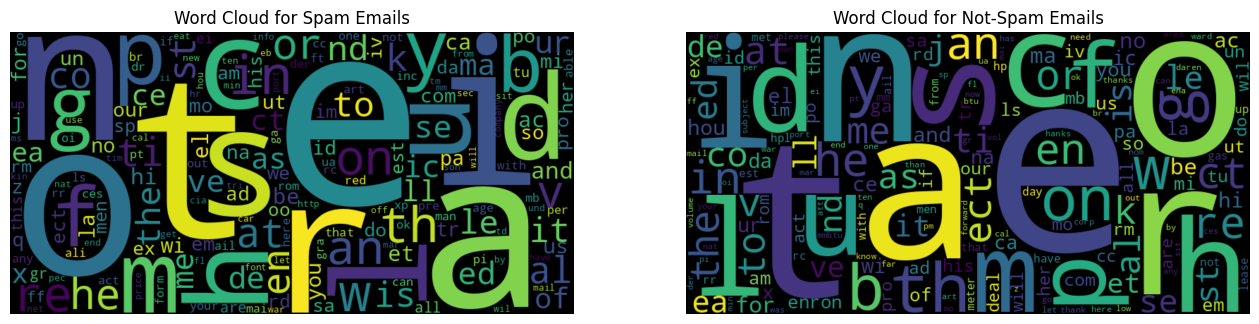

In [ ]:
plt.figure(figsize=(16, 14))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(not_spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Not-Spam Emails')
plt.axis('off')
plt.show()

In [ ]:
data.columns[data.columns.str.startswith('')]

Index(['charlie', 'charge', 'charlotte', 'charges', 'charles', 'charged',
       'charset', 'charlene'],
      dtype='object')

In [ ]:
def drop_char_columns(df: pd.DataFrame) -> pd.DataFrame:
    columns_to_drop = df.columns[df.columns.str.len().isin([1, 2])]
    return df.drop(columns=columns_to_drop, axis=1)

data = drop_char_columns(data)

In [ ]:
data.drop("Email No.", inplace=True, axis=1)

In [ ]:
spam_df = data[data['Prediction'] == 1]
not_spam_df = data[data['Prediction'] == 0]

spam_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(spam_df.iloc[:, 1:-1].sum())
not_spam_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(not_spam_df.iloc[:, 1:-1].sum())


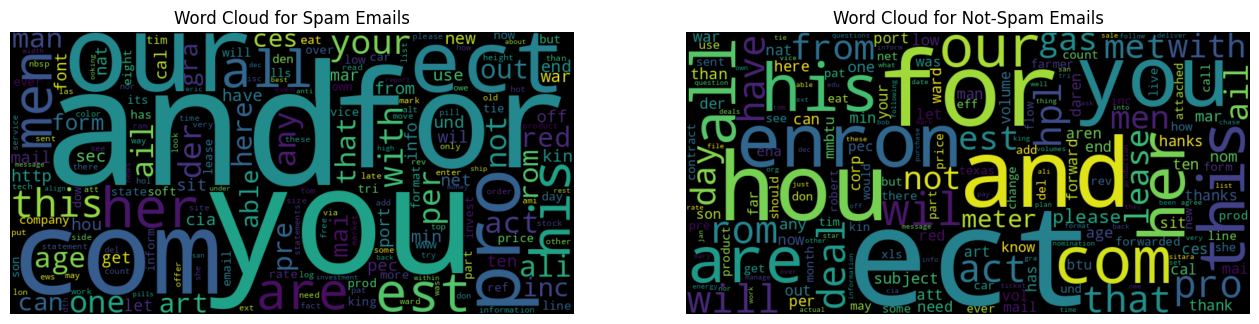

In [ ]:
plt.figure(figsize=(16, 14))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(not_spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Not-Spam Emails')
plt.axis('off')
plt.show()

# Modelling

In [ ]:
X = data.iloc[:, 1:-1]
y = data['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
svc = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svc, param_grid, cv=5, verbose=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svc = SVC()
start_time_svc = time.time()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
end_time_svc = time.time()

elapsed_time_svc = end_time_svc - start_time_svc

print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

print(f"Time taken for SVC: {elapsed_time_svc:.2f} seconds")



SVC Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1097
           1       0.91      0.95      0.93       455

    accuracy                           0.96      1552
   macro avg       0.94      0.95      0.95      1552
weighted avg       0.96      0.96      0.96      1552

Time taken for SVC: 19.29 seconds


In [ ]:
nb = GaussianNB()
start_time_nb = time.time()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
end_time_nb = time.time()

elapsed_time_nb = end_time_nb - start_time_nb

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print(f"Time taken for Naive Bayes: {elapsed_time_nb:.2f} seconds")


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1097
           1       0.85      0.96      0.90       455

    accuracy                           0.94      1552
   macro avg       0.92      0.94      0.93      1552
weighted avg       0.94      0.94      0.94      1552

Time taken for Naive Bayes: 0.31 seconds
